**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
- [Loading the datasets](#toc1_2_)    
- [Chi-square tests](#toc2_)    
  - [Chi-square goodness of fit test](#toc2_1_)    
  - [The chi-square test of independence](#toc2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <a id='toc1_2_'></a>[Loading the datasets](#toc0_)

- The *"late_shipments"* dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part.

In [4]:
late_shipments = pd.read_feather("./datasets/late_shipments.feather")

In [5]:
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [6]:
late_shipments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   float64
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   float64
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

In [7]:
late_shipments.product_group.value_counts()

product_group
ARV     583
HRDT    409
ANTM      5
ACT       3
Name: count, dtype: int64

## <a id='toc2_'></a>[Chi-square tests](#toc0_)

The chi-squared tests are statistical tests used to compare observed and expected frequencies of categorical data.

The chi-squared test is based on the chi-squared distribution. The chi-square distribution is a right-skewed distribution that is bounded below by 0. The shape of the chi-square distribution depends on the degrees of freedom. The higher the degrees of freedom, the more symmetric the distribution becomes. Similar to the F-statistic (in ANOVA test) and F-distribution, the chi-square statistic, $X^2$ and the chi-square distribution is always positive. The p-value is the area under the chi-square distribution to the right of the chi-square statistic.

### <a id='toc2_1_'></a>[Chi-square goodness of fit test](#toc0_)

A one-sample chi-square test is called a chi-square goodness of fit test. It is used to determine whether sample data are consistent with a hypothesized distribution.

The one-sample proportion test is used to determine whether the proportion of success in a ceategorical variable (i.e, the observed distribution) is equal to some hypothesized proportion of success (i.e., the expected distribution of the population). It is an extreme case of the chi-square goodness of fit test.

In general, the idea of chi-square goodness of fit test expands on the idea of the one-sample proportion test. Instead of comparing the observed proportion of success with the hypothesized proportion of success, we compare the observed frequencies of the categories with the expected frequencies of the categories across a common categorical variable.

For a chi-square goodness of fit test, we create a table that compares the observed frequencies of the categories with the expected frequencies of the categories across a common categorical variable. It is called a contingency table. The cells/rows of the table are the categories of the variable and there is one column for the observed frequencies and one column for the expected frequencies. The expected frequencies are calculated based on the expected distribution of the categories in the general population.

An example of a chi-square goodness of fit test is testing whether the observed distribution of eye colors in a sample of 100 people is consistent with the expected distribution of eye colors in the general population. The contingency table for this example might look like this:

| Eye color | Observed frequency | Expected frequency |
|:----------:|:------------------:|:------------------:|
| Brown      |          30        |         35         |
| Blue       |          30        |         25         |
| Green      |          25        |         20         |
| Hazel      |          15        |         20         |
| **Total**  |         **100**    |        **100**     |

**Note:** the chi-square goodness of fit test requires you to know the population distribution that you are testing the observed data against. If you do not have the population data, then you cannot use the chi-square goodness of fit test.

**The null hypothesis** is that the observed distribution of the categorical variable is consistent with the expected distribution of the categorical variable.

**The alternative hypothesis** is not explicitly stated rather it is implicitly understood from the null hypothesis.

When dealing with counts and investigating how far the observed counts are from the expected counts, we use a **test statistic called the chi-square ($X^2$) statistic.**

The chi-square statistic for the chi-square goodness of fit test is calculated as:

$$ X^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i} $$

Where, 
- $k$ is the number of categories
- $O_i$ is the observed frequency of the $i^{th}$ category 
- $E_i$ is the expected frequency of the $i^{th}$ category

The degrees of freedom for the chi-square goodness of fit test is, $$df = k-1$$


The p-value for the chi-square goodness of fit test is the area under the chi-square distribution to the right of the chi-square statistic, $X^2$. The p-value is found from the chi-square distribution table using the calculated chi-square statistic and the degrees of freedom.

> Let's see how to perform a chi-square goodness of fit test with an example using the *"late_shipments"* dataset. Let's say we hypothesize that the categories of the product group variable have the following distribution in the general population: ARV = 0.55, HRDT = 0.4, ANTM = 0.03 and ACT = 0.02. We want to test whether the observed distribution of the categories in the "product_group" column is consistent with the hypothesized distribution.

In [8]:
# Create a DataFrame for the Hypothesized/expected distribution
hypothesized = pd.DataFrame(
    {"product_group": ["ARV", "HRDT", "ANTM", "ACT"], "prop": [0.55, 0.4, 0.03, 0.02]}
)

In [9]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create a column "n" that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

In [10]:
hypothesized

,product_group,prop,n
0,ARV,0.55,550.0
1,HRDT,0.40,400.0
2,ANTM,0.03,30.0
3,ACT,0.02,20.0


In [11]:
# Choose a significance level
alpha = 0.05

In [12]:
# Create a DataFrame for the Observed counts
product_group_counts = (
    pd.DataFrame(late_shipments.product_group.value_counts())
    .reset_index()
    .rename(columns={"count": "n"})
)

In [13]:
product_group_counts

,product_group,n
0,ARV,583
1,HRDT,409
2,ANTM,5
3,ACT,3


The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Let's create a visualization to see how well the hypothesized counts appear to model the observed counts. The natural way to visualize the counts of a categorical variable is with a bar plot.

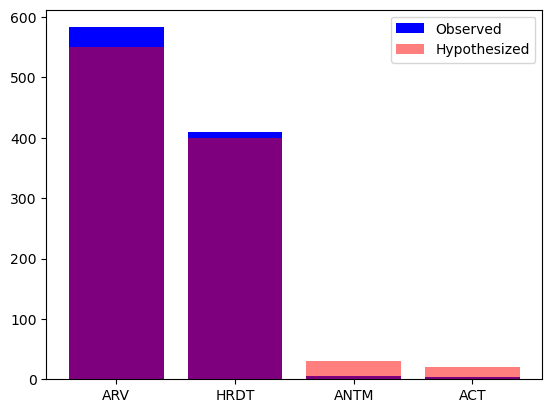

In [14]:
# Plot a blue bar graph of n vs. product_group for the sample counts
plt.bar(
    product_group_counts["product_group"],
    product_group_counts["n"],
    color="blue",
    label="Observed",
)

# Add a red bar plot for the hypothesized counts
plt.bar(
    hypothesized["product_group"],
    hypothesized["n"],
    label="Hypothesized",
    color="red",
    alpha=0.5,
)
plt.legend()
plt.show()

We can see that one of the product group is reasonably well-modeled by the hypothesized distribution but the other three appear quite different, but we'll need to run a hypothesis test to see if the difference is statistically significant. 

We can use the `scipy.stats.chisquare` function to perform a chi-square goodness of fit test. The first argument is the observed counts and the second argument is the expected counts. The function returns the chi-square statistic and the p-value.

In [15]:
from scipy.stats import chisquare

In [16]:
# Perform a goodness of fit test on the product group counts n
gof_test = chisquare(f_obs=product_group_counts["n"], f_exp=hypothesized["n"])

# Print gof_test results
gof_test

Power_divergenceResult(statistic=37.465833333333336, pvalue=3.6670356075536226e-08)

In [17]:
chi_stat, p = gof_test

In [18]:
p < alpha

True

Since the p-value is less than specified significance level of 0.05, we reject the null hypothesis and conclude that the observed distribution of the product group variable is not consistent with the hypothesized distribution.

### <a id='toc2_2_'></a>[The chi-square test of independence](#toc0_)

A chi-square test of independence is used to determine whether there is a significant association between two different categorical variables. 

It is called a test of independence because it measures whether the two variables are independent of each other. Two categorical variables are considered to be statistically independent if the proportion of success in the response variable is the same across all categories of the explanatory variable.

A two-sample proportion test is used to determine whether the proportion of success in a ceategorical response variable is equal across two groups/categories of an explanatory variable. The chi-square test of independence expands on this idea and allows us to test whether there is a significant association between two categorical variables (across all the categories of the response variable and the explanatory variable).

One example of the chi-square test of independence would be a survey that investigates the relationship between gender and favorite genres of music. Gender is a binary categorical variable (Male or Female), while favorite music genres have several categories. The contingency table for the observed frequencies might look like this:

 ------      | Rock  | Pop  | Hip-Hop | Jazz  | *Total*
-------------|-------|------|---------|-------|------------
Male         | 30    | 20   | 25      | 25    | *100*
Female       | 15    | 35   | 20      | 30    | *100*
***Total***  | *45*  | *55* | *45*    | *55*  | *200*

**Note:** 
1. The chi-square test of independence can only be used to compare two categorical variables in a particular sample. It cannot be used to compare across multiple samples.
2. The chi-square test of independence can only be used to compare two categorical variables.

**The null hypothesis** is that there is no association between the two categorical variables. The alternative hypothesis is not explicitly stated rather implicitly understood from the null hypothesis.

**The chi-square ($X^2$) statistic** is used to measure how far the observed counts are from the expected counts assuming the null hypothesis is true.

The expected counts are calculated based on the assumption that the null hypothesis is true. The calculation of the expected counts follows the same intuition as the calculation of $P(A \cap B)$ for two independent events $A$ and $B$ i.e, $P(A \cap B) = P(A)P(B)$. The expected count for a cell is calculated as:

$$ E_{ij} = \frac{R_i \times C_j}{n} $$

Where,
- $E_{ij}$ is the expected count for the $i^{th}$ row and $j^{th}$ column
- $R_i$ is the total count for the $i^{th}$ row
- $C_j$ is the total count for the $j^{th}$ column
- $n$ is the total number of observations i.e, the table total

For the example above, the expected counts would be calculated as:

 ------      | Rock  | Pop  | Hip-Hop | Jazz  | *Total*
-------------|-------|------|---------|-------|------------
Male         | 22.5 | 27.5| 22.5    | 27.5 | *100*
Female       | 22.5 | 27.5| 22.5    | 27.5 | *100*
***Total***  | *45*  | *55* | *45*    | *55*  | *200*


The chi-square statistic for the chi-square test of independence is calculated as:

$$ X^2 = \sum_{m=1}^{k} \frac{(O_{m} - E_{m})^2}{E_{m}} $$

Where,
- $k$ is the number of cells in the table i.e, $k = \text{number of rows} \times \text{number of columns}$.

The degrees of freedom for the chi-square test of independence is calculated as:

$$ df = (r-1)(c-1) $$

Where,
- $r$ is the number of rows in the table
- $c$ is the number of columns in the table

The p-value for the chi-square goodness of fit test is the area under the chi-square distribution to the right of the chi-square statistic, $X^2$. The p-value is found from the chi-square distribution table using the calculated chi-square statistic and the degrees of freedom.

> Let's see how to perform a chi-square test of independence with an example using the *"late_shipments"* dataset.

The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

-> EXW: "Ex works". The buyer pays for transportation of the goods.

-> CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.

-> DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.

-> FCA: "Free carrier". The seller pays for transportation of the goods.

> Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of $\alpha = 0.01$.

$ H_0$ : vendor_inco_term and freight_cost_groups are independent.

$ H_A$ : vendor_inco_term and freight_cost_groups are associated.

In [19]:
alpha = 0.01

In [20]:
# Proportion of freight_cost_groups grouped by vendor_inco_term
props = late_shipments.groupby("vendor_inco_term")["freight_cost_groups"].value_counts(
    normalize=True
)

# Convert props to wide format
wide_props = props.unstack()

In [21]:
wide_props

freight_cost_groups,expensive,reasonable
vendor_inco_term,,
CIP,0.320000,0.680000
DDP,0.550000,0.450000
DDU,NaN,1.000000
EXW,0.583448,0.416552
FCA,0.336364,0.663636


Let's explore the data using a proportional stacked bar plot.

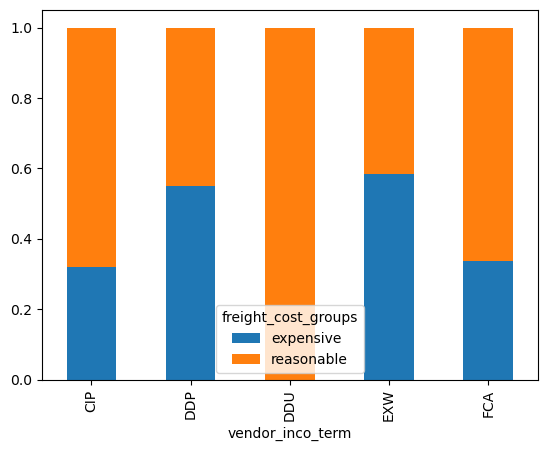

In [22]:
# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

If the cost gruops were independent of incoterms, the split between the cost groups would be at the same height in each of the five bars representing the incoterms categories. There's some significant variation here, but we'll need a chi-square independence test to determine whether it's a significant difference.

To test the independence of two categorical variables, $X$ and $Y$, we can use the `pingouin.chi2_independence` function. The function takes the dataframe and the names of the two categorical variables as arguments. The method returns three different pandas DataFrames: the expected counts, the observed counts, and statistics related to the test.

In [23]:
import pingouin

In [24]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(
    late_shipments, x="freight_cost_groups", y="vendor_inco_term"
)

# One of the arguments to the function is the correction argument.
# It specifies whether or not to apply Yates' continuity correction, which is a fudge factor
# for when the sample size is very small and the degrees of freedom is one.
# Since each group has over one hundred observations, we don't need it here.

# Print results
print(stats.iloc[0])

test        pearson
lambda          1.0
chi2      34.805072
dof             4.0
pval       0.000001
cramer     0.186561
power      0.999235
Name: 0, dtype: object


Since the p-value is less than specified significance level of 0.01, we reject the null hypothesis and conclude that the variables - vendor_inco_term and freight_cost_groups are associated.

**`Note:`** If we run the chi-square test with the variables swapped, then the results are identical. Because of this, we phrase our questions as "are variables X and Y independent?", rather than "is variable X independent from variable Y?", since the order doesn't matter. 

In [25]:
print(
    pingouin.chi2_independence(
        late_shipments, x="freight_cost_groups", y="vendor_inco_term"
    )[2].iloc[0]
)

test        pearson
lambda          1.0
chi2      34.805072
dof             4.0
pval       0.000001
cramer     0.186561
power      0.999235
Name: 0, dtype: object


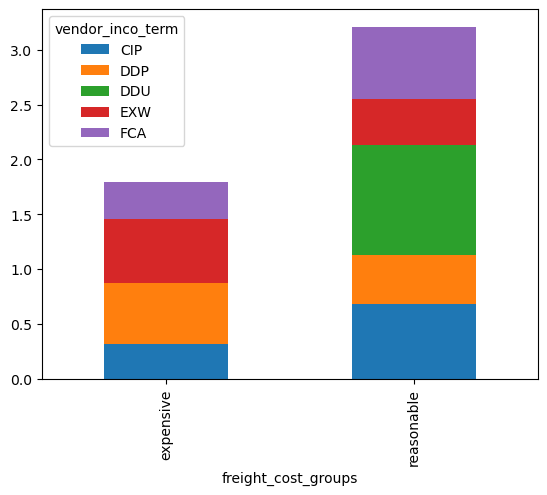

In [26]:
# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.T.plot(kind="bar", stacked=True)
plt.show()